In [1]:
import pandas as pd
import numpy as np
# Create a synthetic dataset for wheat crop monitoring in 2024
np.random.seed(42) # For reproducibility
# Generate data for 200 samples (regions)
data = {
 'Region': np.random.choice(['North', 'South', 'East', 'West'], size=200),
 'Temperature': np.random.normal(loc=20, scale=5, size=200), # Avg temperature with some variance
 'Rainfall': np.random.normal(loc=50, scale=15, size=200), # Avg rainfall in mm
 'Soil Moisture': np.random.normal(loc=30, scale=10, size=200), # Avg soil moisture percentage
 'Crop Yield': np.random.normal(loc=2000, scale=500, size=200), # Crop yield in kg per hectare
 'Year': [2024] * 200 # Year 2024 for all rows
}
# Convert to DataFrame
df = pd.DataFrame(data)
# Introduce anomalies (e.g., abnormal temperature and rainfall)
anomalies = np.random.randint(190, 200, size=10) # Random indices for anomaly injection
df.loc[anomalies, 'Temperature'] = df['Temperature'] * np.random.uniform(1.5, 2.0) # Anomalous temperature
df.loc[anomalies, 'Rainfall'] = df['Rainfall'] * np.random.uniform(0.5, 0.7) # Anomalous rainfall
# Save to CSV
df.to_csv('agricultural_wheat_data_2024.csv', index=False)

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('agricultural_wheat_data_2024.csv')

# Select relevant features for anomaly detection
features = df[['Temperature', 'Rainfall', 'Soil Moisture', 'Crop Yield']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(scaled_features)

# Predict anomalies
df['Anomaly'] = model.predict(scaled_features)

# Anomalies are labeled as -1, normal points as 1
anomalies = df[df['Anomaly'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies)

Number of anomalies detected: 10
    Region  Temperature   Rainfall  Soil Moisture   Crop Yield  Year  Anomaly
79    West    16.428243  34.962060      25.881230  3316.191032  2024       -1
99   North    24.135916  38.489787       7.888647  1214.887640  2024       -1
133  North    39.263657  57.716583      44.960443  1552.696349  2024       -1
146   East    23.431301  46.265538      48.820245  3149.449062  2024       -1
170   West    17.625273  55.498974       3.031134  2144.584322  2024       -1
190   East    51.566303  36.045952      27.450228  2142.932695  2024       -1
192  North    32.592390  25.593604       3.490302  2329.272136  2024       -1
194   East    49.816381  27.926199      42.460852  1911.526386  2024       -1
195  South    23.475400   9.418172       9.266098  1600.851378  2024       -1
199   East    40.851807  28.163757      22.221833  2897.278932  2024       -1


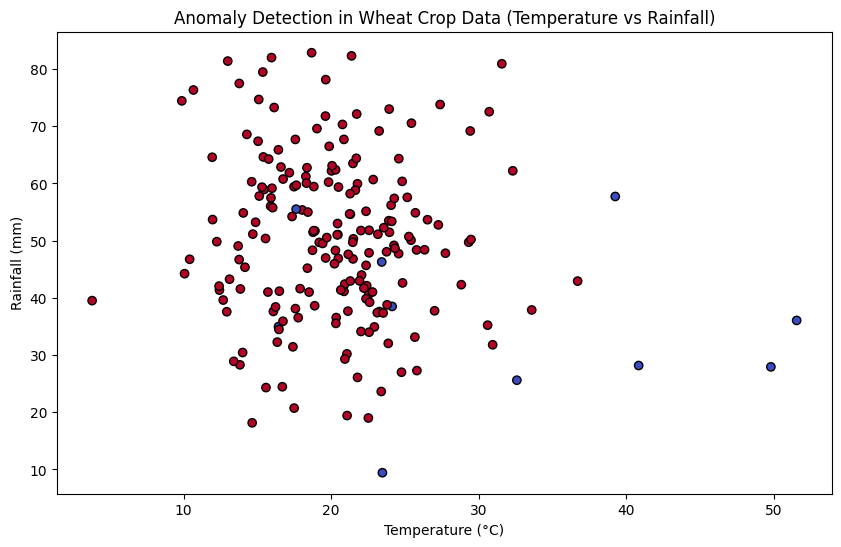

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of Temperature vs Rainfall, coloring anomalies

plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Rainfall'], c=df['Anomaly'], cmap='coolwarm', edgecolor='k')
plt.title('Anomaly Detection in Wheat Crop Data (Temperature vs Rainfall)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()

In [4]:
from sklearn.metrics import classification_report

# Assuming the last 10 rows are anomalies (this was done artificially)
true_labels = np.ones(len(df))
true_labels[-10:] = -1 # Mark the last 10 rows as anomalies

# Classification report
print(classification_report(true_labels, df['Anomaly']))

              precision    recall  f1-score   support

        -1.0       0.50      0.50      0.50        10
         1.0       0.97      0.97      0.97       190

    accuracy                           0.95       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.95      0.95      0.95       200



In [5]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_samples': ['auto', 0.8, 0.9],
 'contamination': [0.02, 0.05, 0.1],
 'max_features': [1, 2, 3, 4]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, scoring='f1_macro', cv=5)
grid_search.fit(scaled_features)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

c:\Users\16682\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\16682\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\16682\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\16682\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_t

Best parameters found:  {'contamination': 0.02, 'max_features': 1, 'max_samples': 'auto', 'n_estimators': 50}


c:\Users\16682\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\16682\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\16682\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan na

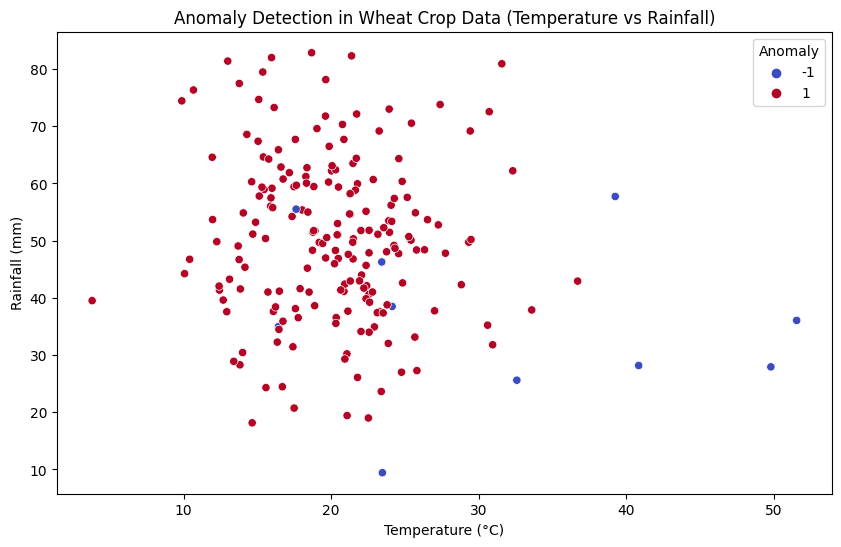

In [6]:
import seaborn as sns

# Plot Temperature vs Rainfall with anomalies highlighted

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Rainfall', hue='Anomaly', data=df, palette='coolwarm')
plt.title('Anomaly Detection in Wheat Crop Data (Temperature vs Rainfall)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()